In [1]:
!pip install imageio

Looking in indexes: https://pypi.org/simple, https://legacy.pypi.org/simple
    100% |████████████████████████████████| 3.3MB 5.2MB/s 


In [2]:
import numpy as np
import random
import matplotlib.pyplot as plt
import imageio
import glob
import os
import scipy.io
from scipy import signal
from scipy import ndimage
import math
from keras.utils import to_categorical #for one hot encoding
from keras import optimizers

#To make it compatible with jupyter notebook
%matplotlib inline
# Fixing random state for reproducibility\n
np.random.seed(1)

Using TensorFlow backend.


In [0]:
import pickle
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from keras.utils import to_categorical
from keras.models import Model
from keras.utils import np_utils

## Load DataSet

In [4]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()

146055168/170498071 [========================>.....] - ETA: 6s

170500096/170498071 [==============================] - 48s 0us/step


In [0]:
train_set_X = train_features
train_set_Y = train_labels
test_set_X = test_features
test_set_Y = test_labels

In [6]:
def print_shapes_of_dataset():
  print("Train X shape: \t" + str(train_set_X.shape))
  print("Train Y shape: \t" + str(train_set_Y.shape))
  print("Test X shape: \t" + str(test_set_X.shape))
  print("Test Y shape: \t" + str(test_set_Y.shape))

print_shapes_of_dataset()

Train X shape: 	(50000, 32, 32, 3)
Train Y shape: 	(50000, 1)
Test X shape: 	(10000, 32, 32, 3)
Test Y shape: 	(10000, 1)


In [7]:
input_shape = train_set_X.shape[1:]
print(input_shape)

(32, 32, 3)


In [8]:
# one hot encode
encoded_train_Y = to_categorical(train_set_Y)
encoded_train_Y = encoded_train_Y.reshape(encoded_train_Y.shape[0], encoded_train_Y.shape[1])

print(encoded_train_Y.shape)

# one hot encode
encoded_test_Y = to_categorical(test_set_Y)
encoded_test_Y = encoded_test_Y.reshape(encoded_test_Y.shape[0], encoded_test_Y.shape[1])

print(encoded_test_Y.shape)

(50000, 10)
(10000, 10)


## Own Network Architecture

In [0]:
#Define model
model = Sequential()

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_1'))

model.add(Conv2D(32, kernel_size = (3, 3),
                 activation = 'relu',
                 input_shape = input_shape,
                 name = 'conv_layer_2'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_1'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_3'))

model.add(Conv2D(64, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_4'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name='max_pool_layer_2'))

#Add a convolution layer to the model with 32 filters of size 3*3
#Default stride is assumed
model.add(Conv2D(128, kernel_size = (3, 3),
                 activation = 'relu',
                 name = 'conv_layer_5'))

#Add max pooling to the output of the previous layer
model.add(MaxPooling2D(name = 'max_pool_layer_3'))

#Add a layer that will flatten out the tensor
model.add(Flatten(name = 'flatten_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(1024, activation = 'relu', name='dense_layer_1'))

#Add a final dense layer that will be used for prediction
model.add(Dense(encoded_train_Y.shape[1], activation = 'softmax',name='final_layer'))

In [10]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv_layer_1 (Conv2D)        (None, 30, 30, 32)        896       
_________________________________________________________________
conv_layer_2 (Conv2D)        (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pool_layer_1 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv_layer_3 (Conv2D)        (None, 12, 12, 64)        18496     
_________________________________________________________________
conv_layer_4 (Conv2D)        (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pool_layer_2 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv_layer_5 (Conv2D)        (None, 3, 3, 128)         73856     
__________

## Training Model

In [0]:
#Compile the model tell which loss to use and the optimizer and a evaluation metric if any
model.compile(loss = 'categorical_crossentropy',
              optimizer = optimizers.SGD(lr=0.01, decay=1e-6),
              metrics=['accuracy'])

In [12]:
history_1 = model.fit(train_set_X, encoded_train_Y,
          batch_size = 100,
          epochs = 100,
          validation_data = (test_set_X, encoded_test_Y))

Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 13s 266us/step - loss: 2.0759 - acc: 0.2516 - val_loss: 1.7265 - val_acc: 0.3773
Epoch 2/100
28900/50000 [================>.............] - ETA: 4s - loss: 1.7021 - acc: 0.3899

50000/50000 [==============================] - 11s 218us/step - loss: 1.6644 - acc: 0.4032 - val_loss: 1.6319 - val_acc: 0.4327
Epoch 3/100
50000/50000 [==============================] - 11s 217us/step - loss: 1.4920 - acc: 0.4667 - val_loss: 1.5050 - val_acc: 0.4735
Epoch 4/100
45600/50000 [==========================>...] - ETA: 0s - loss: 1.3823 - acc: 0.5109

50000/50000 [==============================] - 11s 219us/step - loss: 1.3755 - acc: 0.5130 - val_loss: 1.3199 - val_acc: 0.5339
Epoch 5/100
50000/50000 [==============================] - 11s 219us/step - loss: 1.2913 - acc: 0.5450 - val_loss: 1.2868 - val_acc: 0.5375
Epoch 6/100
50000/50000 [==============================] - 11s 221us/step - loss: 1.2071 - acc: 0.5771 - val_loss: 1.2669 - val_acc: 0.5522


Epoch 7/100
50000/50000 [==============================] - 11s 217us/step - loss: 1.1387 - acc: 0.5995 - val_loss: 1.3394 - val_acc: 0.5474
Epoch 8/100
50000/50000 [==============================] - 11s 218us/step - loss: 1.0846 - acc: 0.6205 - val_loss: 1.1534 - val_acc: 0.5949
Epoch 9/100
35200/50000 [====================>.........] - ETA: 2s - loss: 1.0264 - acc: 0.6447

50000/50000 [==============================] - 11s 216us/step - loss: 1.0221 - acc: 0.6447 - val_loss: 1.1439 - val_acc: 0.5996
Epoch 10/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.9720 - acc: 0.6595 - val_loss: 1.1357 - val_acc: 0.6133
Epoch 11/100
47100/50000 [===========================>..] - ETA: 0s - loss: 0.9254 - acc: 0.6765

50000/50000 [==============================] - 11s 217us/step - loss: 0.9256 - acc: 0.6762 - val_loss: 1.1285 - val_acc: 0.6190
Epoch 12/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.8747 - acc: 0.6944 - val_loss: 1.1178 - val_acc: 0.6237
Epoch 13/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.8299 - acc: 0.7092

50000/50000 [==============================] - 11s 219us/step - loss: 0.8299 - acc: 0.7092 - val_loss: 1.1477 - val_acc: 0.6115
Epoch 14/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.7919 - acc: 0.7228 - val_loss: 1.1737 - val_acc: 0.6106
Epoch 15/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.7489 - acc: 0.7370 - val_loss: 1.1388 - val_acc: 0.6273
Epoch 16/100
  100/50000 [..............................] - ETA: 12s - loss: 0.5573 - acc: 0.8100

50000/50000 [==============================] - 11s 217us/step - loss: 0.7123 - acc: 0.7483 - val_loss: 1.1607 - val_acc: 0.6265
Epoch 17/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.6715 - acc: 0.7655 - val_loss: 1.2132 - val_acc: 0.6202
Epoch 18/100
39300/50000 [======================>.......] - ETA: 2s - loss: 0.6282 - acc: 0.7814

50000/50000 [==============================] - 11s 221us/step - loss: 0.6353 - acc: 0.7787 - val_loss: 1.2124 - val_acc: 0.6209
Epoch 19/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.5992 - acc: 0.7906 - val_loss: 1.3033 - val_acc: 0.6124
Epoch 20/100
48400/50000 [============================>.] - ETA: 0s - loss: 0.5549 - acc: 0.8023

50000/50000 [==============================] - 11s 216us/step - loss: 0.5554 - acc: 0.8019 - val_loss: 1.3475 - val_acc: 0.6123
Epoch 21/100
50000/50000 [==============================] - 11s 215us/step - loss: 0.5261 - acc: 0.8156 - val_loss: 1.2990 - val_acc: 0.6234
Epoch 22/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.5042 - acc: 0.8216 - val_loss: 1.3545 - val_acc: 0.6220


Epoch 23/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.4706 - acc: 0.8330 - val_loss: 1.3761 - val_acc: 0.6222
Epoch 24/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.4409 - acc: 0.8435 - val_loss: 1.5307 - val_acc: 0.5907
Epoch 25/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.4070 - acc: 0.8561

50000/50000 [==============================] - 11s 217us/step - loss: 0.4209 - acc: 0.8510 - val_loss: 1.4206 - val_acc: 0.6289
Epoch 26/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.3830 - acc: 0.8641 - val_loss: 1.5689 - val_acc: 0.6016
Epoch 27/100
47100/50000 [===========================>..] - ETA: 0s - loss: 0.3676 - acc: 0.8711

50000/50000 [==============================] - 11s 219us/step - loss: 0.3686 - acc: 0.8706 - val_loss: 1.5119 - val_acc: 0.6291
Epoch 28/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.3377 - acc: 0.8818 - val_loss: 1.6473 - val_acc: 0.6177
Epoch 29/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.3217 - acc: 0.8867

50000/50000 [==============================] - 11s 217us/step - loss: 0.3215 - acc: 0.8868 - val_loss: 1.6469 - val_acc: 0.6253
Epoch 30/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.3022 - acc: 0.8934 - val_loss: 1.7706 - val_acc: 0.6090
Epoch 31/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.2952 - acc: 0.8968 - val_loss: 1.7866 - val_acc: 0.6286
Epoch 32/100
  100/50000 [..............................] - ETA: 12s - loss: 0.2203 - acc: 0.9300

50000/50000 [==============================] - 11s 216us/step - loss: 0.2596 - acc: 0.9089 - val_loss: 1.8907 - val_acc: 0.6204
Epoch 33/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.2516 - acc: 0.9132 - val_loss: 2.0698 - val_acc: 0.6006
Epoch 34/100
39200/50000 [======================>.......] - ETA: 2s - loss: 0.2152 - acc: 0.9245

50000/50000 [==============================] - 11s 220us/step - loss: 0.2303 - acc: 0.9184 - val_loss: 1.8813 - val_acc: 0.6273
Epoch 35/100
50000/50000 [==============================] - 11s 221us/step - loss: 0.2224 - acc: 0.9231 - val_loss: 1.9246 - val_acc: 0.6137
Epoch 36/100
48100/50000 [===========================>..] - ETA: 0s - loss: 0.2103 - acc: 0.9267

50000/50000 [==============================] - 11s 219us/step - loss: 0.2142 - acc: 0.9254 - val_loss: 1.9675 - val_acc: 0.6185
Epoch 37/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1967 - acc: 0.9312 - val_loss: 2.1223 - val_acc: 0.6084
Epoch 38/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.1914 - acc: 0.9347 - val_loss: 2.1101 - val_acc: 0.6219


Epoch 39/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1982 - acc: 0.9318 - val_loss: 2.1071 - val_acc: 0.6187
Epoch 40/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1734 - acc: 0.9401 - val_loss: 2.3404 - val_acc: 0.6005
Epoch 41/100
34100/50000 [===================>..........] - ETA: 3s - loss: 0.2136 - acc: 0.9328

50000/50000 [==============================] - 11s 220us/step - loss: 0.2029 - acc: 0.9340 - val_loss: 2.3065 - val_acc: 0.6181
Epoch 42/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1385 - acc: 0.9525 - val_loss: 2.3027 - val_acc: 0.6253
Epoch 43/100
47000/50000 [===========================>..] - ETA: 0s - loss: 0.1600 - acc: 0.9456

50000/50000 [==============================] - 11s 219us/step - loss: 0.1613 - acc: 0.9453 - val_loss: 2.1797 - val_acc: 0.6271
Epoch 44/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.1663 - acc: 0.9448 - val_loss: 2.7391 - val_acc: 0.5719
Epoch 45/100
49800/50000 [============================>.] - ETA: 0s - loss: 0.1725 - acc: 0.9429

50000/50000 [==============================] - 11s 220us/step - loss: 0.1725 - acc: 0.9429 - val_loss: 2.1070 - val_acc: 0.6129
Epoch 46/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1539 - acc: 0.9502 - val_loss: 2.3464 - val_acc: 0.6139
Epoch 47/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.1518 - acc: 0.9520 - val_loss: 2.4822 - val_acc: 0.6067
Epoch 48/100
  100/50000 [..............................] - ETA: 11s - loss: 0.1699 - acc: 0.9400

50000/50000 [==============================] - 11s 219us/step - loss: 0.1082 - acc: 0.9641 - val_loss: 2.4596 - val_acc: 0.6230
Epoch 49/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1416 - acc: 0.9530 - val_loss: 2.4278 - val_acc: 0.6226
Epoch 50/100
39300/50000 [======================>.......] - ETA: 2s - loss: 0.1321 - acc: 0.9561

50000/50000 [==============================] - 11s 220us/step - loss: 0.1421 - acc: 0.9523 - val_loss: 2.4587 - val_acc: 0.6229
Epoch 51/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1439 - acc: 0.9518 - val_loss: 2.4706 - val_acc: 0.6183
Epoch 52/100
47900/50000 [===========================>..] - ETA: 0s - loss: 0.0952 - acc: 0.9683

50000/50000 [==============================] - 11s 220us/step - loss: 0.0989 - acc: 0.9671 - val_loss: 2.6618 - val_acc: 0.6148
Epoch 53/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1300 - acc: 0.9594 - val_loss: 2.5297 - val_acc: 0.6235
Epoch 54/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1465 - acc: 0.9526 - val_loss: 2.5177 - val_acc: 0.6254


Epoch 55/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.1099 - acc: 0.9627 - val_loss: 2.6413 - val_acc: 0.6239
Epoch 56/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.1091 - acc: 0.9640 - val_loss: 2.6694 - val_acc: 0.6221
Epoch 57/100
34500/50000 [===================>..........] - ETA: 3s - loss: 0.0980 - acc: 0.9674

50000/50000 [==============================] - 11s 220us/step - loss: 0.1211 - acc: 0.9602 - val_loss: 2.5653 - val_acc: 0.6217
Epoch 58/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.1315 - acc: 0.9594 - val_loss: 2.4981 - val_acc: 0.6137
Epoch 59/100
47100/50000 [===========================>..] - ETA: 0s - loss: 0.1007 - acc: 0.9663

50000/50000 [==============================] - 11s 219us/step - loss: 0.1112 - acc: 0.9634 - val_loss: 2.6226 - val_acc: 0.6269
Epoch 60/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1121 - acc: 0.9635 - val_loss: 2.6469 - val_acc: 0.6134
Epoch 61/100
49800/50000 [============================>.] - ETA: 0s - loss: 0.1064 - acc: 0.9655

50000/50000 [==============================] - 11s 221us/step - loss: 0.1061 - acc: 0.9656 - val_loss: 2.7121 - val_acc: 0.6263
Epoch 62/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.0817 - acc: 0.9731 - val_loss: 2.9584 - val_acc: 0.6130
Epoch 63/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0885 - acc: 0.9705 - val_loss: 2.8598 - val_acc: 0.6212
Epoch 64/100
  100/50000 [..............................] - ETA: 13s - loss: 0.4920 - acc: 0.8700

50000/50000 [==============================] - 11s 221us/step - loss: 0.1407 - acc: 0.9562 - val_loss: 2.6889 - val_acc: 0.6246
Epoch 65/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1041 - acc: 0.9662 - val_loss: 2.7641 - val_acc: 0.6271
Epoch 66/100
39400/50000 [======================>.......] - ETA: 2s - loss: 0.0845 - acc: 0.9733

50000/50000 [==============================] - 11s 219us/step - loss: 0.0931 - acc: 0.9704 - val_loss: 2.7276 - val_acc: 0.6223
Epoch 67/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.0807 - acc: 0.9731 - val_loss: 2.9881 - val_acc: 0.6071
Epoch 68/100
48400/50000 [============================>.] - ETA: 0s - loss: 0.0818 - acc: 0.9737

50000/50000 [==============================] - 11s 217us/step - loss: 0.0848 - acc: 0.9729 - val_loss: 2.9688 - val_acc: 0.6195
Epoch 69/100
50000/50000 [==============================] - 11s 216us/step - loss: 0.0709 - acc: 0.9769 - val_loss: 3.2494 - val_acc: 0.5998
Epoch 70/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.1608 - acc: 0.9516 - val_loss: 2.8193 - val_acc: 0.6136


Epoch 71/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.0867 - acc: 0.9711 - val_loss: 2.8081 - val_acc: 0.6321
Epoch 72/100
50000/50000 [==============================] - 11s 223us/step - loss: 0.0878 - acc: 0.9728 - val_loss: 2.7636 - val_acc: 0.6354
Epoch 73/100
34600/50000 [===================>..........] - ETA: 3s - loss: 0.0522 - acc: 0.9817

50000/50000 [==============================] - 11s 218us/step - loss: 0.0588 - acc: 0.9800 - val_loss: 2.9188 - val_acc: 0.6270
Epoch 74/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.0554 - acc: 0.9821 - val_loss: 2.9367 - val_acc: 0.6195
Epoch 75/100
47100/50000 [===========================>..] - ETA: 0s - loss: 0.0924 - acc: 0.9728

50000/50000 [==============================] - 11s 217us/step - loss: 0.0968 - acc: 0.9714 - val_loss: 2.9246 - val_acc: 0.6172
Epoch 76/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.0925 - acc: 0.9701 - val_loss: 3.1641 - val_acc: 0.6001
Epoch 77/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.1147 - acc: 0.9643

50000/50000 [==============================] - 11s 217us/step - loss: 0.1150 - acc: 0.9642 - val_loss: 2.8465 - val_acc: 0.6080
Epoch 78/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.0698 - acc: 0.9771 - val_loss: 2.9919 - val_acc: 0.6317
Epoch 79/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.0835 - acc: 0.9745 - val_loss: 3.0218 - val_acc: 0.6204
Epoch 80/100
  100/50000 [..............................] - ETA: 11s - loss: 0.0789 - acc: 0.9800

50000/50000 [==============================] - 11s 220us/step - loss: 0.0985 - acc: 0.9691 - val_loss: 3.5990 - val_acc: 0.5880
Epoch 81/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.0918 - acc: 0.9711 - val_loss: 3.0154 - val_acc: 0.6140
Epoch 82/100
39100/50000 [======================>.......] - ETA: 2s - loss: 0.0713 - acc: 0.9767

50000/50000 [==============================] - 11s 219us/step - loss: 0.0732 - acc: 0.9763 - val_loss: 3.0563 - val_acc: 0.6333
Epoch 83/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0782 - acc: 0.9747 - val_loss: 2.9890 - val_acc: 0.6292
Epoch 84/100
48000/50000 [===========================>..] - ETA: 0s - loss: 0.0555 - acc: 0.9826

50000/50000 [==============================] - 11s 219us/step - loss: 0.0579 - acc: 0.9816 - val_loss: 3.2148 - val_acc: 0.6224
Epoch 85/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0408 - acc: 0.9867 - val_loss: 3.0945 - val_acc: 0.6373
Epoch 86/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0343 - acc: 0.9887 - val_loss: 3.2354 - val_acc: 0.6315


Epoch 87/100
50000/50000 [==============================] - 11s 217us/step - loss: 0.0431 - acc: 0.9862 - val_loss: 3.1401 - val_acc: 0.6338
Epoch 88/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1174 - acc: 0.9675 - val_loss: 2.9487 - val_acc: 0.6233
Epoch 89/100
34300/50000 [===================>..........] - ETA: 3s - loss: 0.0795 - acc: 0.9748

50000/50000 [==============================] - 11s 220us/step - loss: 0.0816 - acc: 0.9751 - val_loss: 2.9957 - val_acc: 0.6273
Epoch 90/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.0954 - acc: 0.9713 - val_loss: 3.0068 - val_acc: 0.6286
Epoch 91/100
47200/50000 [===========================>..] - ETA: 0s - loss: 0.0844 - acc: 0.9726

50000/50000 [==============================] - 11s 220us/step - loss: 0.0887 - acc: 0.9714 - val_loss: 3.1216 - val_acc: 0.6197
Epoch 92/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.0593 - acc: 0.9807 - val_loss: 3.2849 - val_acc: 0.6196
Epoch 93/100
49900/50000 [============================>.] - ETA: 0s - loss: 0.0465 - acc: 0.9846

50000/50000 [==============================] - 11s 219us/step - loss: 0.0465 - acc: 0.9846 - val_loss: 3.2245 - val_acc: 0.6249
Epoch 94/100
50000/50000 [==============================] - 11s 220us/step - loss: 0.0323 - acc: 0.9894 - val_loss: 3.1962 - val_acc: 0.6312
Epoch 95/100
50000/50000 [==============================] - 11s 218us/step - loss: 0.0520 - acc: 0.9840 - val_loss: 3.1350 - val_acc: 0.6275
Epoch 96/100
  100/50000 [..............................] - ETA: 12s - loss: 0.0024 - acc: 1.0000

50000/50000 [==============================] - 11s 219us/step - loss: 0.0605 - acc: 0.9808 - val_loss: 3.2157 - val_acc: 0.6265
Epoch 97/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.1040 - acc: 0.9711 - val_loss: 3.1729 - val_acc: 0.6176
Epoch 98/100
39400/50000 [======================>.......] - ETA: 2s - loss: 0.0860 - acc: 0.9734

50000/50000 [==============================] - 11s 218us/step - loss: 0.0878 - acc: 0.9728 - val_loss: 3.2674 - val_acc: 0.6247
Epoch 99/100
50000/50000 [==============================] - 11s 219us/step - loss: 0.0803 - acc: 0.9749 - val_loss: 3.1229 - val_acc: 0.6247
Epoch 100/100
48000/50000 [===========================>..] - ETA: 0s - loss: 0.0470 - acc: 0.9847

50000/50000 [==============================] - 11s 218us/step - loss: 0.0477 - acc: 0.9845 - val_loss: 3.2112 - val_acc: 0.6296


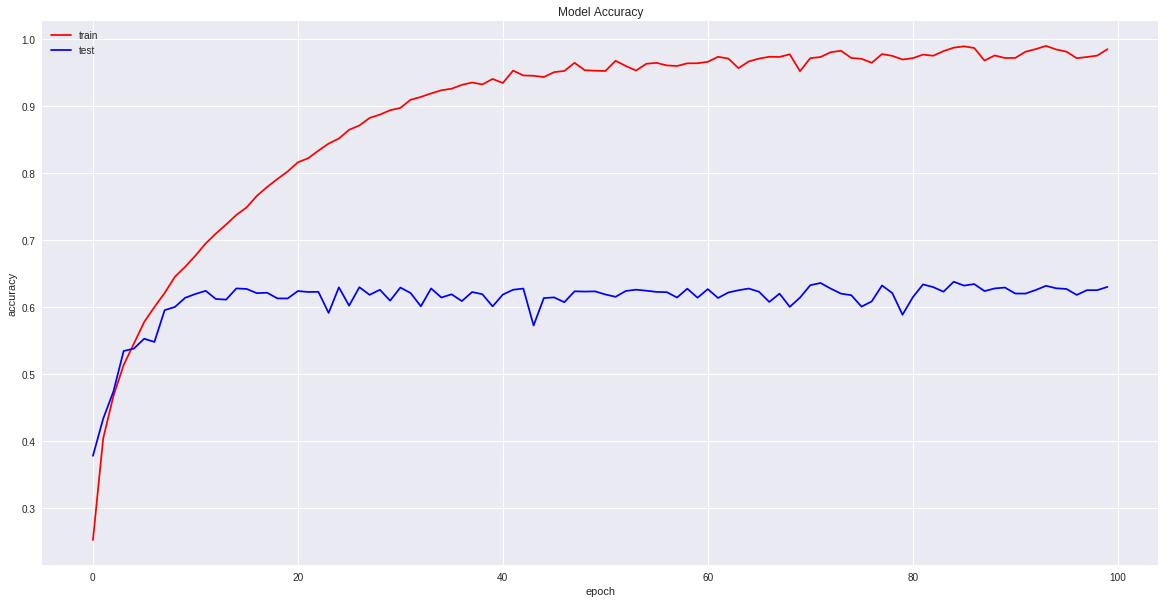

In [13]:
# list all data in history
# summarize history for accuracy
plt.figure(figsize=(20,10))
plt.plot(history_1.history['acc'], color = 'r')
plt.plot(history_1.history['val_acc'], color = 'b')

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['train', 'test'], loc='upper left')
plt.show()


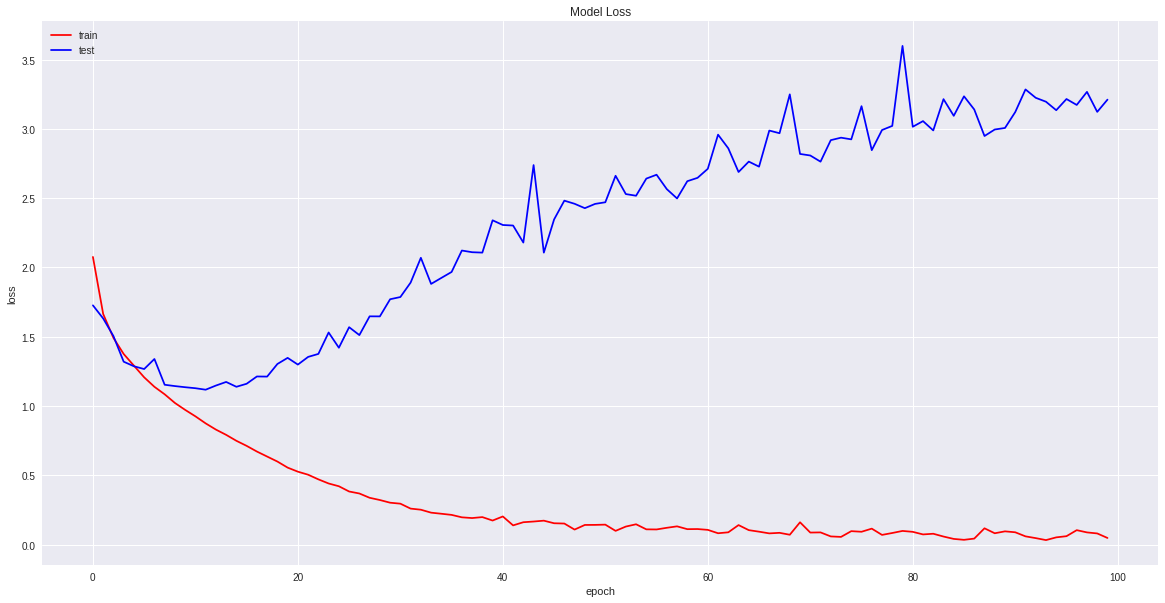

In [14]:
# summarize history for loss
plt.figure(figsize=(20,10))
plt.plot(history_1.history['loss'], color = 'r')
plt.plot(history_1.history['val_loss'], color = 'b')
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()